In [152]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [153]:
import pandas as pd
import numpy as np
# from dataaug import SmilesEnumerator, SmilesIterator
from datagen import DataGenerator, smiles_dict, smiles_to_seq

In [154]:
len(smiles_dict)

42

In [155]:
print(smiles_dict)

{'#': 1, '(': 2, ')': 3, '+': 4, '-': 5, '/': 6, '1': 7, '2': 8, '3': 9, '4': 10, '5': 11, '6': 12, '7': 13, '8': 14, '=': 15, 'C': 16, 'F': 17, 'H': 18, 'I': 19, 'N': 20, 'O': 21, 'P': 22, 'S': 23, '[': 24, '\\': 25, ']': 26, '_': 27, 'c': 28, 'Cl': 29, 'Br': 30, 'n': 31, 'o': 32, 's': 33, '@': 34, '.': 35, 'a': 36, 'B': 37, 'e': 38, 'i': 39, '9': 40, '10': 41, '11': 42}


Data augmentation:

https://arxiv.org/pdf/1703.07076.pdf

https://github.com/EBjerrum/molvecgen

https://github.com/Ebjerrum/SMILES-enumeration

In [156]:
df = pd.read_csv('data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [157]:
max_len_idx = df['canonical_smiles'].apply(len).argmax()
min_len_idx = df['canonical_smiles'].apply(len).argmin()
max_sequence_len = len(df['canonical_smiles'].iloc[max_len_idx]) + 20

In [158]:
df

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096910
...,...,...,...,...,...
5038,CHEMBL4554172,Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4cccc(F)c4)CC3)sc2-...,10000.0,10000.0,5.000000
5039,CHEMBL4533844,Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4ccccc4C(F)(F)F)CC3...,7570.0,7570.0,5.120904
5040,CHEMBL4570655,Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4ccccc4C)CC3)sc2-c2...,10000.0,10000.0,5.000000
5041,CHEMBL4571704,COc1cc(O)c2c(c1)C1=C(c3c(O)c(O)cc(C)c3-c3cc(OC...,15500.0,15500.0,4.809668


In [159]:
X = df['canonical_smiles'].values
y = df['pIC50'].values

In [160]:
dgen = DataGenerator(X, y, max_sequence_len, batch_size=16)

In [161]:
len(dgen) * dgen.batch_size

5056

In [162]:
for i, (X_b, y_b) in enumerate(dgen):
    print(f'{i}\r', end='')


# Canonical_smiles To secuence

In [163]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# tk = Tokenizer(char_level=True, lower=False, )
# tk.fit_on_texts(X, )
# tk.word_index
# X_seq = tk.texts_to_sequences(X, )
# X_seq_pad = pad_sequences(X_seq)

In [164]:
# df['canonical_smiles_encoded'] = df['canonical_smiles'].apply(lambda x: smiles_to_seq(x, max_sequence_len))

In [165]:
# X = np.array([l for l in df['canonical_smiles_encoded'].values])
# y = df['pIC50'].values

In [166]:
X.shape, y.shape

((5043,), (5043,))

In [167]:
# X[max_len_idx]

In [168]:
# X[min_len_idx]

# Split

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [171]:
len(X_train), len(y_train), len(X_test)

(4034, 4034, 1009)

In [172]:
X_train

array(['Cc1ccc2c(NCc3ccccc3)c3c(nc2c1)CCCC3',
       'CN(C)S(=O)(=O)NC1CCc2c(O)cccc2C1',
       'CCN(CCCCCCCNC1=CC(=O)C(NCCCCCCCN(CC)Cc2ccccc2OC)=CC1=O)Cc1ccccc1OC',
       ..., 'O=C(Cc1cc(=O)oc2cc(O)ccc12)NNC(=S)Nc1c2c(nc3ccccc13)CCCC2',
       'CCCCCCCNC(=O)Oc1cccc(Cn2cc(COc3ccc4ccc(=O)oc4c3)nn2)c1',
       'CN(C)Cc1ccc(CSCCCCCCCSCc2ccc(CN(C)C)o2)o1'], dtype=object)

In [173]:
dgen_train = DataGenerator(X_train, y_train, seq_length=max_sequence_len, batch_size=128, data_augmentation=True)
dgen_test = DataGenerator(X_test, y_test, seq_length=max_sequence_len, batch_size=128, data_augmentation=False)

In [174]:
for i, (X_b, y_b) in enumerate(dgen_test):
    print(f'{i}\r', end='')

In [175]:
X_b.shape

(113, 227)

# Data augmentation (Optional)

In [176]:
# X_train = np.vstack([X_train, X_train[:, ::-1]])

In [177]:
# X_train.shape

In [178]:
# y_train = np.hstack([y_train, y_train])

In [179]:
# y_train.shape


# Network Model

In [180]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout, Activation, BatchNormalization, Conv1D, MaxPool1D, GlobalAveragePooling1D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import backend as K
import tensorflow as tf

In [449]:
from tensorflow.keras import layers as L



In [595]:
from tensorflow.keras import layers as L


In [597]:
def text_cnn_1d(sequence_length, vocab_size, embedding_size, filter_sizes, num_filters):
    max_pool_div = 4
    input_x = L.Input(shape=(sequence_length,), name='input_x')
    embedding = L.Embedding(vocab_size + 1, embedding_size, name='embedding')(input_x)
    pooled_outputs = []
    for filter_size in filter_sizes:
        conv = L.Conv1D(filters=num_filters, kernel_size=filter_size, padding='same', dilation_rate=1, activation='relu')(embedding)
        max_p = L.MaxPool1D((sequence_length - filter_size + 1)//max_pool_div)(conv)
        pooled_outputs.append(max_p)
        
        conv = L.Conv1D(filters=num_filters, kernel_size=filter_size, padding='same', dilation_rate=2, activation='relu')(embedding)
        max_p = L.MaxPool1D((sequence_length - filter_size + 1)//max_pool_div)(conv)
        pooled_outputs.append(max_p)
        
        conv = L.Conv1D(filters=num_filters, kernel_size=filter_size, padding='same', dilation_rate=3, activation='relu')(embedding)
        max_p = L.MaxPool1D((sequence_length - filter_size + 1)//max_pool_div)(conv)
        pooled_outputs.append(max_p)
    h_pool = L.Concatenate(axis=2)(pooled_outputs)
    dense = L.Flatten()(h_pool)
    dense = L.Dense(100, activation='relu')(dense)
    dense = L.Dense(100, activation='relu')(dense)
    dense = L.Dense(1)(dense)
    model = tf.keras.models.Model(input_x, dense)
    return model

In [607]:
FILTER_SIZES = (3, 4, 5)
NUM_FILTERS = 128
vocab_size = len(smiles_dict)
embeddings_size = 128 # 2
# model = text_cnn(max_sequence_len, vocab_size + 1, embeddings_size, FILTER_SIZES, NUM_FILTERS, None, drop_out=0, l2_reg_lambda=0, dense_hidden_size=50)
# model.summary()

In [608]:
model = text_cnn_1d(max_sequence_len, vocab_size, embeddings_size, FILTER_SIZES, NUM_FILTERS)
model.summary()

Model: "model_77"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_x (InputLayer)            [(None, 227)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 227, 128)     5504        input_x[0][0]                    
__________________________________________________________________________________________________
conv1d_177 (Conv1D)             (None, 227, 128)     49280       embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_178 (Conv1D)             (None, 227, 128)     49280       embedding[0][0]                  
___________________________________________________________________________________________

In [609]:
# model.summary()

In [610]:
def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [611]:
# # num_filters = 128
# dropout_rate=0.1
# embeddings_size = 64
# model = Sequential()
# model.add(Embedding(vocab_size + 1, embeddings_size, input_length=max_sequence_len))
# model.add(Conv1D(embeddings_size * 2, 5, activation='linear', padding='valid'))
# # model.add(BatchNormalization())
# model.add(Activation('relu'))
# # model.add(Dropout(dropout_rate))
# model.add(MaxPool1D(pool_size=2, strides=2))
# model.add(Conv1D(embeddings_size * 4, 5, activation='linear', padding='valid'))
# # model.add(BatchNormalization())
# model.add(Activation('relu'))
# # model.add(Dropout(dropout_rate))
# model.add(MaxPool1D(pool_size=2, strides=2))
# model.add(Conv1D(num_filters * 6, 5, activation='linear', padding='valid'))
# # model.add(BatchNormalization())
# model.add(Activation('relu'))
# # model.add(Dropout(dropout_rate))
# model.add(MaxPool1D(pool_size=2, strides=2))
# model.add(GlobalAveragePooling1D())
# # model.add(Flatten())
# model.add(Dense(50, activation='linear'))
# # model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dense(1))

In [612]:
# model.summary()

In [619]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=[R2])

In [620]:
mcp = ModelCheckpoint('models/best_model_{epoch}', save_best_only=True, save_format="h5")

In [689]:
history = model.fit(dgen_train, epochs=10, validation_data=dgen_test)

Epoch 1/10
32/32 [==============================] - 14s 437ms/step - loss: 0.1489 - R2: 0.9454 - val_loss: 0.8806 - val_R2: 0.7069
Epoch 2/10
32/32 [==============================] - 14s 435ms/step - loss: 0.1414 - R2: 0.9482 - val_loss: 0.9105 - val_R2: 0.7100
Epoch 3/10
32/32 [==============================] - 14s 433ms/step - loss: 0.1556 - R2: 0.9428 - val_loss: 0.8764 - val_R2: 0.7187
Epoch 4/10
32/32 [==============================] - 14s 436ms/step - loss: 0.1488 - R2: 0.9461 - val_loss: 0.8875 - val_R2: 0.7096
Epoch 5/10
32/32 [==============================] - 14s 442ms/step - loss: 0.1542 - R2: 0.9455 - val_loss: 0.8791 - val_R2: 0.7009
Epoch 6/10
32/32 [==============================] - 14s 435ms/step - loss: 0.1423 - R2: 0.9505 - val_loss: 0.8899 - val_R2: 0.7037
Epoch 7/10
32/32 [==============================] - 14s 442ms/step - loss: 0.1459 - R2: 0.9471 - val_loss: 0.9018 - val_R2: 0.7052
Epoch 8/10
32/32 [==============================] - 14s 435ms/step - loss: 0.1422 -

In [690]:
# model.history.history

In [691]:
X_test_eval = []
y_t_eval = []
for X_t, y_t in dgen_test:
    X_test_eval = X_test_eval + [list(t) for t in X_t]
    y_t_eval = y_t_eval + list(y_t)
X_test_eval = np.array(X_test_eval)
y_test = np.array(y_t_eval)

In [692]:
X_test_eval.shape, y_test.shape

((1009, 227), (1009,))

In [693]:
y_pred = model.predict(X_test_eval)

# Score

In [694]:
r2 = 1 - ((y_test - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

In [695]:
r2
# 0.4984533246797399

0.7014036846882661

In [679]:
filename = 'models/embed_128_text_cnn_aug_100x100_0.0001.h5'
model.save(filename)

In [680]:
# model.summary()

# Load model (solo si se grabo el modelo)

In [681]:
from tensorflow.keras.models import load_model

In [682]:
model_loaded = load_model(filename, custom_objects={'R2': R2})

In [683]:
# model_loaded.summary()

In [684]:
y_pred = model_loaded.predict(X_test_eval)

In [685]:
r2 = 1 - ((y_test - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
r2

0.7098606662410253

# Evaluación

<function matplotlib.pyplot.show(close=None, block=None)>

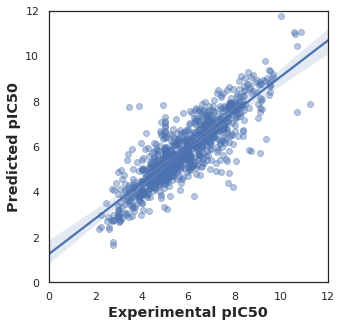

In [686]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# TSNE

In [668]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [669]:
embedings = model.layers[1].get_weights()[0][1:]

In [670]:
embedings.shape

(42, 128)

In [671]:
if embedings.shape[1] == 2:
    print('TSNE not necesary. Already in R2')
    X_2d = embedings.copy()
else:
    tsne = TSNE(2)
    X_2d = tsne.fit_transform(embedings)
    

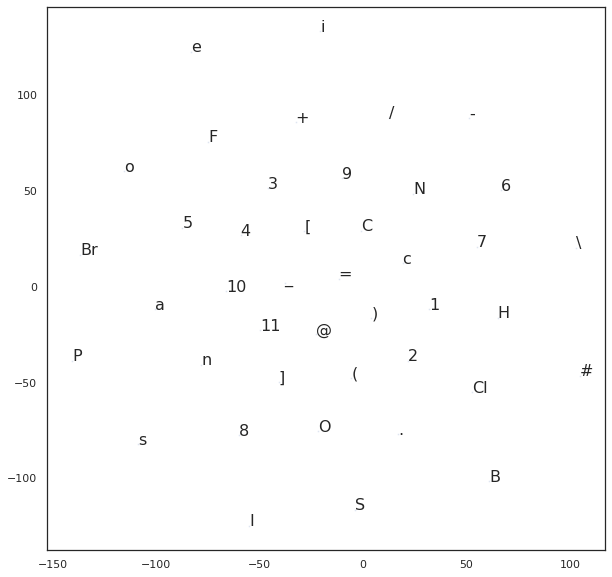

In [672]:
plt.figure(figsize=(10,10))
plt.scatter(X_2d[:, 0], X_2d[:, 1], s=1, alpha=0.1)
for i, t in enumerate(smiles_dict):
    plt.text(X_2d[i, 0], X_2d[i, 1], t, fontsize=16)